# Decorators - The Art of Decorating Functions and Classes

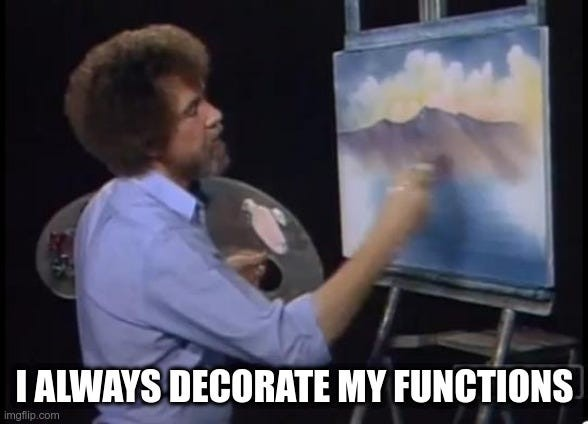

Decorators in Python are a highly `versatile` and useful tool, providing an elegant way to `enhance or modify the behavior of functions or methods`. They allow programmers to wrap another function in order to `extend the behavior` of the wrapped function, without permanently modifying it.

Decorators in Python are a sophisticated tool, enabling developers to enhance the functionality of classes, functions, or methods in a clean and maintainable way. Understanding when and how to use them effectively can significantly improve the design of your software, making it more modular, reusable, and robust.

## What are Decorators: 

+ Decorators provide a simple syntax for calling _higher-order functions_. 
+ a higher-order function is a function that take a function as an argument and return a function. 



## Types of Decorators
1. `Function Decorators:` These are the most common decorators, which are applied to functions and methods. They can modify the input, output, or behavior of the function in some way.
2. `Class Decorators:` These decorators are applied to classes. They can be used to modify class properties, methods, or even the entire class structure.
3. `Method Decorators:` Similar to function decorators but specifically designed for methods within a class. These include @classmethod, @staticmethod, and @property.
5.  `Parameterized Decorators:` These are more complex as they take parameters themselves and return a decorator. They allow for more flexible and dynamic behaviors to be implemented.

_____

## Lets get some things straight:

We must be comfortable with the fact that `everything` in Python (Yes! Even classes), are `objects`. Functions are no exceptions, they are objects too (with attributes). Various different names can be bound to the same function object.

In [ ]:
def first(msg):
    print(msg)
    
first("Hello")

second = first

second("Hi")

When you run the code, both functions `first` and `second` give the same output. Here, the names first and second refer to the same function object.

Now things start getting weirder.

> Functions can be passed as arguments to another function.
Such functions that take other functions as arguments are also called `higher order functions`. Here is an example of such a function.

In [ ]:
def inc(x):
    print("Lower order function is called")
    return x + 1 


def dec(x):
    print("Lower order function is called")
    return x - 1


def operate(func, x):
    print("higher order function is called")
    result = func(x)
    return result

In [ ]:
operate(inc,3)



In [ ]:
operate(dec,16)

Furthermore, a function can return another function.

In [ ]:
def is_called():  # created 1st function
    def is_returned():  # Created 2nd function (nested)
        print("Hello, I'm the nested function that shall be returned")
    return is_returned


new = is_called()

# Outputs "Hello"
new()

_______

Not only can Functions take other functios as parameters or return functions.. Function can also Wrap around other functions! 

The term "`wrapper`" refers to a function that "wraps" another function, modifying its behavior. `Wrappers are fundamental to understanding how decorators work`, as they are the mechanism through which decorators alter the functionality of functions or methods.

## Function Decorators 
### without Parameters


Purpose: Function decorators are designed to log the entry and exit of any function they decorate. They are useful for debugging and tracing the flow of a program, especially during development or when monitoring a live system.

In [ ]:
def uppercase_decorator(func):
    def wrapper():
        print("Entering the original function!")
        function_result = func()
        make_uppercase = function_result.upper()
        return make_uppercase
    return wrapper
        
    
@uppercase_decorator    
def greeting():
    return "Welcome in the course!"


print(greeting())

In [ ]:
x = uppercase_decorator(greeting) # if you want to run it this way, you have to comment out the decorator in the code-cel above
x()


1. uppercase_decorator is a function that takes another function func as an argument.
2. Inside uppercase_decorator, a nested function wrapper is defined, which encapsulates additional statements to alter func's behaviour.
3. The decorator returns wrapper, which replaces greeting() but still calls it internally (via the func variable). This allows uppercase_decorator to add behavior to greeeting().

### Applying multiple Decorators to one function

In [ ]:
def uppercase_decorator(func):
    def wrapper():
        function_result = func()
        make_uppercase = function_result.upper()
        return make_uppercase
    return wrapper


def split_string_decorator(func):
    def wrapper():
        function_result = func()
        splitted_string = function_result.split()
        return splitted_string
    return wrapper


@split_string_decorator
@uppercase_decorator
def greeting():
    return 'Welcome to Python'


print(greeting())

In [ ]:
split_string_decorator(uppercase_decorator(greeting))() #if you want to run it this way, you have to comment out the decorators in the code-cel above



In [ ]:
x = split_string_decorator(uppercase_decorator(greeting)) #if you want to run it this way, you have to comment out the decorators in the code-cel above
x()

## Function Decorators 
### with Parameters

In [ ]:
'''This decorator function is a higher order function
that takes a function as a parameter'''

def my_decorator(func):
    def wrapper(*args, **kwargs):
        print("Something is happening before the function is called.")
        result = func(*args, **kwargs)
        print("Something is happening after the function is called.")
        return result
    return wrapper


@my_decorator
def say_hello(name):
    print(f"Hello, {name}!")

say_hello("Alice")




Explanation:

1. my_decorator is a function that takes another function func as an argument.
2. Inside my_decorator, a nested function wrapper is defined, which encapsulates additional statements to execute before and after func.
3. The decorator returns wrapper, which replaces say_hello but still calls it internally. This allows my_decorator to add pre- and post-execution behavior to say_hello.

In [ ]:
def log_decorator(func):
    def wrapper(*args, **kwargs):
        print(f"Entering {func.__name__}")
        result = func(*args, **kwargs)
        print(f"Exiting {func.__name__}")
        return result
    return wrapper

class Classroom:
    @log_decorator
    def add_student(self, student):
        print(f"Student {student} added to classroom")

# Usage
classroom = Classroom()
classroom.add_student("Alice")

## Decorators for timing function executions

In [6]:
import time

def timer_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()  # Record the start time
        result = func(*args, **kwargs)  # Execute the function
        end_time = time.time()  # Record the end time
        duration = end_time - start_time  # Calculate duration
        print(f"{func.__name__} executed in {duration:.4f} seconds")  # Print the duration
        return result  # Return the original function's result
    return wrapper

@timer_decorator
def process_data():
    # Simulate some data processing that might take variable time
    time.sleep(3)  # Simulate 3s delay 
    return "Processed"

# Example use of the decorated function
process_data()  



process_data executed in 3.0049 seconds


'Processed'

___________

## Class Decorators

Class decorator dynamically `adds a new method schedule to any class it decorates`. This is useful for enhancing classes with `new functionalities` without altering their original definitions.



In [7]:
def add_schedule_method(cls):
    def schedule_method(self, timeslot):
        print(f"Schedule set for {self.name} at {timeslot}")
    cls.schedule_method = schedule_method
    return cls

@add_schedule_method
class Classroom:
    def __init__(self, name):
        self.name = name

# Usage
classroom = Classroom("Math Class")
classroom.schedule_method("10:00-11:00")

Schedule set for Math Class at 10:00-11:00


How it works:

* The decorator add_schedule_method takes a class cls as an argument.
* It defines a new method schedule within the decorator, which prints a scheduled timeslot.
* This new method is then attached to the class being decorated.
* The modified class, now equipped with the new method, is returned, effectively altering the class's functionality.

__________

## Method Decorators

These built-in decorators are used to define methods within a class that `aren't primarily concerned with instance data`. 
+ @staticmethod can be called without a class or instance reference
* @classmethod operates on the class itself rather than instance data.

## @staticmethod

 The @staticmethod decorator is used to define methods in a class that do not need access to the instance (`self`) or the class (`cls`) itself. **These methods can be called on the class itself without the need to instantiate the class.** They behave just like regular functions but are included in the class's body to keep the code organized or because they are logically related to the class.

In [ ]:
class Student:
    school_name = "Highland High"

    @staticmethod
    def is_school_open(day):
        return day.lower() not in ["saturday", "sunday"]

# Usage
print(Student.is_school_open("Monday"))  # True


In [ ]:
class SchoolUtility():
    
    @staticmethod
    def calculate_gpa(grades):
        if not grades:
            return 0
        total = sum(grades)
        return total / len(grades)
    
    @staticmethod
    def is_passing_grade(grades):
        return grades >=60
    
    
grades = [85, 90, 88, 70, 79]

SchoolUtility.calculate_gpa(grades)
SchoolUtility.is_passing_grade(82.4)

## @classmethod

The @classmethod decorator is used in Python to define a method in a class `that receives the class itself as the first argument instead of the instance (self)`. This makes class methods powerful tools for `factory methods`, which are methods that return an instance of the class, and for accessing or modifying class state that is common across all instances.

In [ ]:
class Employee():
    
    def __init__(self, name, salary):
        self.name = name
        self.salary = salary
        
    
    @classmethod 
    def create_instance_from_job(cls, name, job_title):
        if job_title.lower() == "engineer":
            return cls(name, 50000)
        elif job_title.lower() == "manager":
            return cls(name, 75000)
        elif job_title.lower() == "executive":
            return cls(name, 100000)
        else:
            raise ValueError("Unknown Job-Title")
    
    def display(self):
        print(f"{self.name}, Salary: ${self.salary}")
            

            
            
engineer = Employee.create_instance_from_job("Alice", "Engineer")


Lisa = Employee("Lisa", 65000) # It is still possible to create instances without using the classmethod

engineer.display()
Lisa.display()
        

from_job_title Class Method:
This method serves as a `factory method`, because it produces objects/instances of the class employee based on the job title. It encapsulates the salary logic according to the job role, thus keeping the instantiation logic for different job roles centralized and easy to manage.

By using a class method for instantiation, it’s easy to `add additional job titles and associated logic without altering the constructor`. This makes the class scalable and adaptable to changes in business requirements.
The class method also promotes code `reusability` and `encapsulation`, as the salary-setting logic is maintained in one place and can be updated independently of other parts of the class.

In [ ]:
class Device:
    def __init__(self, model, battery, display):
        self.model = model
        self.battery = battery  # in mAh
        self.display = display  # in inches

    def __repr__(self):
        return f"{self.model} (Battery: {self.battery} mAh, Display: {self.display} inches)"

    @classmethod
    def from_model(cls, model):
        if model == "Model X":
            return cls(model, 4000, 5.5)
        elif model == "Model Y":
            return cls(model, 3000, 5.0)
        elif model == "Model Z":
            return cls(model, 4500, 6.1)
        else:
            raise ValueError("Unknown model")

# Usage
device_x = Device.from_model("Model X")
device_y = Device.from_model("Model Y")
device_z = Device.from_model("Model Z")

print(device_x)  # Model X (Battery: 4000 mAh, Display: 5.5 inches)
print(device_y)  # Model Y (Battery: 3000 mAh, Display: 5.0 inches)
print(device_z)  # Model Z (Battery: 4500 mAh, Display: 6.1 inches)

The from_model class method acts as a `factory` that produces device instances based on a given model name. This method simplifies the creation of Device objects by encapsulating the specifications for each model within a single method. This pattern is particularly beneficial when object construction involves multiple steps or complex configurations.